## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 53ms	remaining: 53s
1:	learn: 0.9301086	total: 56.4ms	remaining: 28.2s
2:	learn: 0.9005637	total: 60.1ms	remaining: 20s
3:	learn: 0.8720983	total: 64.6ms	remaining: 16.1s
4:	learn: 0.8467410	total: 67.6ms	remaining: 13.5s
5:	learn: 0.8226672	total: 70.7ms	remaining: 11.7s
6:	learn: 0.7994702	total: 73.7ms	remaining: 10.4s
7:	learn: 0.7784272	total: 76.7ms	remaining: 9.52s
8:	learn: 0.7602192	total: 80ms	remaining: 8.81s
9:	learn: 0.7412421	total: 83.1ms	remaining: 8.22s
10:	learn: 0.7247930	total: 86.2ms	remaining: 7.75s
11:	learn: 0.7089951	total: 89.2ms	remaining: 7.35s
12:	learn: 0.6951345	total: 92.1ms	remaining: 6.99s
13:	learn: 0.6809276	total: 95.2ms	remaining: 6.71s
14:	learn: 0.6692630	total: 97.9ms	remaining: 6.43s
15:	learn: 0.6588323	total: 101ms	remaining: 6.22s
16:	learn: 0.6472700	total: 104ms	remaining: 6.02s
17:	learn: 0.6379982	total: 107ms	remaining: 5.84s
18:	learn: 0.6294674	total: 110ms	remaining: 5.67s
19:	

43:	learn: 0.5116444	total: 183ms	remaining: 3.98s
44:	learn: 0.5100547	total: 186ms	remaining: 3.94s
45:	learn: 0.5069096	total: 189ms	remaining: 3.91s
46:	learn: 0.5051685	total: 191ms	remaining: 3.88s
47:	learn: 0.5033968	total: 194ms	remaining: 3.85s
48:	learn: 0.5012433	total: 197ms	remaining: 3.83s
49:	learn: 0.4986132	total: 200ms	remaining: 3.8s
50:	learn: 0.4968022	total: 203ms	remaining: 3.77s
51:	learn: 0.4951632	total: 206ms	remaining: 3.75s
52:	learn: 0.4928924	total: 209ms	remaining: 3.73s
53:	learn: 0.4917272	total: 211ms	remaining: 3.7s
54:	learn: 0.4895079	total: 214ms	remaining: 3.68s
55:	learn: 0.4881884	total: 217ms	remaining: 3.66s
56:	learn: 0.4861566	total: 220ms	remaining: 3.63s
57:	learn: 0.4850201	total: 222ms	remaining: 3.61s
58:	learn: 0.4840055	total: 225ms	remaining: 3.59s
59:	learn: 0.4824455	total: 228ms	remaining: 3.58s
60:	learn: 0.4809744	total: 231ms	remaining: 3.56s
61:	learn: 0.4801376	total: 234ms	remaining: 3.54s
62:	learn: 0.4792422	total: 237ms

107:	learn: 0.4447909	total: 374ms	remaining: 3.09s
108:	learn: 0.4440936	total: 377ms	remaining: 3.08s
109:	learn: 0.4435519	total: 380ms	remaining: 3.08s
110:	learn: 0.4431075	total: 383ms	remaining: 3.07s
111:	learn: 0.4425498	total: 386ms	remaining: 3.06s
112:	learn: 0.4419106	total: 389ms	remaining: 3.06s
113:	learn: 0.4414425	total: 393ms	remaining: 3.05s
114:	learn: 0.4407446	total: 396ms	remaining: 3.05s
115:	learn: 0.4402011	total: 399ms	remaining: 3.04s
116:	learn: 0.4398559	total: 402ms	remaining: 3.03s
117:	learn: 0.4392990	total: 404ms	remaining: 3.02s
118:	learn: 0.4389153	total: 407ms	remaining: 3.02s
119:	learn: 0.4383331	total: 410ms	remaining: 3.01s
120:	learn: 0.4378136	total: 413ms	remaining: 3s
121:	learn: 0.4375553	total: 416ms	remaining: 2.99s
122:	learn: 0.4369995	total: 419ms	remaining: 2.99s
123:	learn: 0.4366325	total: 422ms	remaining: 2.98s
124:	learn: 0.4362823	total: 424ms	remaining: 2.97s
125:	learn: 0.4359535	total: 427ms	remaining: 2.96s
126:	learn: 0.4

174:	learn: 0.4144190	total: 566ms	remaining: 2.67s
175:	learn: 0.4140875	total: 569ms	remaining: 2.66s
176:	learn: 0.4136755	total: 572ms	remaining: 2.66s
177:	learn: 0.4133860	total: 575ms	remaining: 2.65s
178:	learn: 0.4129780	total: 578ms	remaining: 2.65s
179:	learn: 0.4122907	total: 581ms	remaining: 2.64s
180:	learn: 0.4119188	total: 584ms	remaining: 2.64s
181:	learn: 0.4115412	total: 586ms	remaining: 2.63s
182:	learn: 0.4112620	total: 590ms	remaining: 2.63s
183:	learn: 0.4107734	total: 593ms	remaining: 2.63s
184:	learn: 0.4104881	total: 595ms	remaining: 2.62s
185:	learn: 0.4100009	total: 598ms	remaining: 2.62s
186:	learn: 0.4096453	total: 601ms	remaining: 2.61s
187:	learn: 0.4093395	total: 604ms	remaining: 2.61s
188:	learn: 0.4090020	total: 607ms	remaining: 2.6s
189:	learn: 0.4085981	total: 610ms	remaining: 2.6s
190:	learn: 0.4082397	total: 613ms	remaining: 2.59s
191:	learn: 0.4079846	total: 615ms	remaining: 2.59s
192:	learn: 0.4076364	total: 618ms	remaining: 2.58s
193:	learn: 0.

236:	learn: 0.3941497	total: 756ms	remaining: 2.43s
237:	learn: 0.3939819	total: 759ms	remaining: 2.43s
238:	learn: 0.3938322	total: 762ms	remaining: 2.42s
239:	learn: 0.3935463	total: 765ms	remaining: 2.42s
240:	learn: 0.3933166	total: 768ms	remaining: 2.42s
241:	learn: 0.3930992	total: 770ms	remaining: 2.41s
242:	learn: 0.3928898	total: 773ms	remaining: 2.41s
243:	learn: 0.3926199	total: 776ms	remaining: 2.4s
244:	learn: 0.3923955	total: 779ms	remaining: 2.4s
245:	learn: 0.3922312	total: 781ms	remaining: 2.39s
246:	learn: 0.3919499	total: 784ms	remaining: 2.39s
247:	learn: 0.3917420	total: 787ms	remaining: 2.39s
248:	learn: 0.3915186	total: 790ms	remaining: 2.38s
249:	learn: 0.3912759	total: 792ms	remaining: 2.38s
250:	learn: 0.3908375	total: 795ms	remaining: 2.37s
251:	learn: 0.3904815	total: 798ms	remaining: 2.37s
252:	learn: 0.3902127	total: 800ms	remaining: 2.36s
253:	learn: 0.3900274	total: 803ms	remaining: 2.36s
254:	learn: 0.3898171	total: 806ms	remaining: 2.35s
255:	learn: 0.

300:	learn: 0.3793733	total: 947ms	remaining: 2.2s
301:	learn: 0.3791607	total: 950ms	remaining: 2.19s
302:	learn: 0.3789297	total: 954ms	remaining: 2.19s
303:	learn: 0.3787482	total: 957ms	remaining: 2.19s
304:	learn: 0.3786528	total: 960ms	remaining: 2.19s
305:	learn: 0.3784406	total: 963ms	remaining: 2.18s
306:	learn: 0.3782934	total: 966ms	remaining: 2.18s
307:	learn: 0.3781631	total: 969ms	remaining: 2.18s
308:	learn: 0.3779278	total: 972ms	remaining: 2.17s
309:	learn: 0.3777358	total: 975ms	remaining: 2.17s
310:	learn: 0.3775809	total: 978ms	remaining: 2.17s
311:	learn: 0.3774323	total: 982ms	remaining: 2.16s
312:	learn: 0.3772732	total: 985ms	remaining: 2.16s
313:	learn: 0.3771184	total: 991ms	remaining: 2.16s
314:	learn: 0.3769370	total: 994ms	remaining: 2.16s
315:	learn: 0.3766643	total: 997ms	remaining: 2.16s
316:	learn: 0.3764891	total: 1000ms	remaining: 2.15s
317:	learn: 0.3762751	total: 1s	remaining: 2.15s
318:	learn: 0.3761284	total: 1s	remaining: 2.15s
319:	learn: 0.3760

365:	learn: 0.3677932	total: 1.14s	remaining: 1.97s
366:	learn: 0.3676022	total: 1.14s	remaining: 1.97s
367:	learn: 0.3674148	total: 1.15s	remaining: 1.97s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.96s
369:	learn: 0.3671985	total: 1.15s	remaining: 1.96s
370:	learn: 0.3670563	total: 1.15s	remaining: 1.96s
371:	learn: 0.3669128	total: 1.16s	remaining: 1.95s
372:	learn: 0.3668381	total: 1.16s	remaining: 1.95s
373:	learn: 0.3666564	total: 1.16s	remaining: 1.95s
374:	learn: 0.3663789	total: 1.17s	remaining: 1.94s
375:	learn: 0.3661576	total: 1.17s	remaining: 1.94s
376:	learn: 0.3659742	total: 1.17s	remaining: 1.94s
377:	learn: 0.3658330	total: 1.17s	remaining: 1.93s
378:	learn: 0.3656680	total: 1.18s	remaining: 1.93s
379:	learn: 0.3654606	total: 1.18s	remaining: 1.93s
380:	learn: 0.3651842	total: 1.18s	remaining: 1.92s
381:	learn: 0.3650538	total: 1.19s	remaining: 1.92s
382:	learn: 0.3649246	total: 1.19s	remaining: 1.91s
383:	learn: 0.3647854	total: 1.19s	remaining: 1.91s
384:	learn: 

429:	learn: 0.3576138	total: 1.33s	remaining: 1.77s
430:	learn: 0.3575528	total: 1.33s	remaining: 1.76s
431:	learn: 0.3574686	total: 1.34s	remaining: 1.76s
432:	learn: 0.3572923	total: 1.34s	remaining: 1.76s
433:	learn: 0.3571859	total: 1.34s	remaining: 1.75s
434:	learn: 0.3570185	total: 1.35s	remaining: 1.75s
435:	learn: 0.3568416	total: 1.35s	remaining: 1.75s
436:	learn: 0.3566846	total: 1.35s	remaining: 1.74s
437:	learn: 0.3565875	total: 1.36s	remaining: 1.75s
438:	learn: 0.3564768	total: 1.37s	remaining: 1.75s
439:	learn: 0.3563559	total: 1.37s	remaining: 1.75s
440:	learn: 0.3561557	total: 1.38s	remaining: 1.74s
441:	learn: 0.3559793	total: 1.38s	remaining: 1.74s
442:	learn: 0.3558695	total: 1.38s	remaining: 1.74s
443:	learn: 0.3557039	total: 1.38s	remaining: 1.73s
444:	learn: 0.3555934	total: 1.39s	remaining: 1.73s
445:	learn: 0.3553700	total: 1.39s	remaining: 1.73s
446:	learn: 0.3553048	total: 1.39s	remaining: 1.72s
447:	learn: 0.3550824	total: 1.4s	remaining: 1.72s
448:	learn: 0

478:	learn: 0.3507270	total: 1.52s	remaining: 1.66s
479:	learn: 0.3506003	total: 1.52s	remaining: 1.65s
480:	learn: 0.3505111	total: 1.53s	remaining: 1.65s
481:	learn: 0.3503906	total: 1.53s	remaining: 1.64s
482:	learn: 0.3501522	total: 1.53s	remaining: 1.64s
483:	learn: 0.3500494	total: 1.54s	remaining: 1.64s
484:	learn: 0.3498921	total: 1.54s	remaining: 1.63s
485:	learn: 0.3497143	total: 1.54s	remaining: 1.63s
486:	learn: 0.3496172	total: 1.54s	remaining: 1.63s
487:	learn: 0.3494609	total: 1.55s	remaining: 1.62s
488:	learn: 0.3493200	total: 1.55s	remaining: 1.62s
489:	learn: 0.3491550	total: 1.55s	remaining: 1.62s
490:	learn: 0.3490323	total: 1.56s	remaining: 1.61s
491:	learn: 0.3488767	total: 1.56s	remaining: 1.61s
492:	learn: 0.3487285	total: 1.56s	remaining: 1.61s
493:	learn: 0.3486318	total: 1.56s	remaining: 1.6s
494:	learn: 0.3485016	total: 1.57s	remaining: 1.6s
495:	learn: 0.3484072	total: 1.57s	remaining: 1.6s
496:	learn: 0.3482698	total: 1.57s	remaining: 1.59s
497:	learn: 0.3

545:	learn: 0.3421242	total: 1.71s	remaining: 1.43s
546:	learn: 0.3419673	total: 1.72s	remaining: 1.42s
547:	learn: 0.3418121	total: 1.72s	remaining: 1.42s
548:	learn: 0.3416228	total: 1.72s	remaining: 1.42s
549:	learn: 0.3414331	total: 1.73s	remaining: 1.41s
550:	learn: 0.3413090	total: 1.73s	remaining: 1.41s
551:	learn: 0.3411591	total: 1.73s	remaining: 1.41s
552:	learn: 0.3410901	total: 1.74s	remaining: 1.4s
553:	learn: 0.3409923	total: 1.74s	remaining: 1.4s
554:	learn: 0.3408730	total: 1.74s	remaining: 1.4s
555:	learn: 0.3408310	total: 1.74s	remaining: 1.39s
556:	learn: 0.3407365	total: 1.75s	remaining: 1.39s
557:	learn: 0.3406506	total: 1.75s	remaining: 1.39s
558:	learn: 0.3405352	total: 1.75s	remaining: 1.38s
559:	learn: 0.3404352	total: 1.76s	remaining: 1.38s
560:	learn: 0.3403419	total: 1.76s	remaining: 1.38s
561:	learn: 0.3402836	total: 1.76s	remaining: 1.37s
562:	learn: 0.3402264	total: 1.76s	remaining: 1.37s
563:	learn: 0.3400466	total: 1.77s	remaining: 1.36s
564:	learn: 0.3

609:	learn: 0.3353398	total: 1.91s	remaining: 1.22s
610:	learn: 0.3352669	total: 1.91s	remaining: 1.22s
611:	learn: 0.3351716	total: 1.91s	remaining: 1.21s
612:	learn: 0.3351155	total: 1.92s	remaining: 1.21s
613:	learn: 0.3350041	total: 1.92s	remaining: 1.21s
614:	learn: 0.3349098	total: 1.92s	remaining: 1.2s
615:	learn: 0.3348304	total: 1.92s	remaining: 1.2s
616:	learn: 0.3347009	total: 1.93s	remaining: 1.2s
617:	learn: 0.3346458	total: 1.93s	remaining: 1.19s
618:	learn: 0.3345381	total: 1.93s	remaining: 1.19s
619:	learn: 0.3344101	total: 1.94s	remaining: 1.19s
620:	learn: 0.3343267	total: 1.94s	remaining: 1.18s
621:	learn: 0.3342275	total: 1.94s	remaining: 1.18s
622:	learn: 0.3341456	total: 1.95s	remaining: 1.18s
623:	learn: 0.3340640	total: 1.95s	remaining: 1.17s
624:	learn: 0.3339122	total: 1.95s	remaining: 1.17s
625:	learn: 0.3337503	total: 1.96s	remaining: 1.17s
626:	learn: 0.3336593	total: 1.96s	remaining: 1.17s
627:	learn: 0.3335713	total: 1.97s	remaining: 1.16s
628:	learn: 0.3

672:	learn: 0.3288859	total: 2.1s	remaining: 1.02s
673:	learn: 0.3288145	total: 2.1s	remaining: 1.02s
674:	learn: 0.3286969	total: 2.1s	remaining: 1.01s
675:	learn: 0.3286108	total: 2.11s	remaining: 1.01s
676:	learn: 0.3285218	total: 2.11s	remaining: 1.01s
677:	learn: 0.3284620	total: 2.11s	remaining: 1s
678:	learn: 0.3283999	total: 2.12s	remaining: 1s
679:	learn: 0.3283506	total: 2.12s	remaining: 998ms
680:	learn: 0.3282208	total: 2.12s	remaining: 995ms
681:	learn: 0.3281020	total: 2.13s	remaining: 992ms
682:	learn: 0.3280328	total: 2.13s	remaining: 988ms
683:	learn: 0.3279574	total: 2.13s	remaining: 985ms
684:	learn: 0.3278928	total: 2.13s	remaining: 982ms
685:	learn: 0.3278094	total: 2.14s	remaining: 979ms
686:	learn: 0.3277178	total: 2.14s	remaining: 976ms
687:	learn: 0.3276684	total: 2.14s	remaining: 972ms
688:	learn: 0.3275537	total: 2.15s	remaining: 969ms
689:	learn: 0.3274808	total: 2.15s	remaining: 966ms
690:	learn: 0.3273839	total: 2.15s	remaining: 963ms
691:	learn: 0.3272773

737:	learn: 0.3231289	total: 2.29s	remaining: 814ms
738:	learn: 0.3230697	total: 2.29s	remaining: 811ms
739:	learn: 0.3229734	total: 2.3s	remaining: 808ms
740:	learn: 0.3228697	total: 2.3s	remaining: 804ms
741:	learn: 0.3227984	total: 2.3s	remaining: 801ms
742:	learn: 0.3226895	total: 2.31s	remaining: 798ms
743:	learn: 0.3225924	total: 2.31s	remaining: 795ms
744:	learn: 0.3225096	total: 2.31s	remaining: 791ms
745:	learn: 0.3224088	total: 2.31s	remaining: 788ms
746:	learn: 0.3223202	total: 2.32s	remaining: 785ms
747:	learn: 0.3222404	total: 2.32s	remaining: 782ms
748:	learn: 0.3221810	total: 2.32s	remaining: 779ms
749:	learn: 0.3221342	total: 2.33s	remaining: 776ms
750:	learn: 0.3220746	total: 2.33s	remaining: 773ms
751:	learn: 0.3219897	total: 2.33s	remaining: 769ms
752:	learn: 0.3218990	total: 2.34s	remaining: 766ms
753:	learn: 0.3218179	total: 2.34s	remaining: 763ms
754:	learn: 0.3217323	total: 2.34s	remaining: 760ms
755:	learn: 0.3216617	total: 2.35s	remaining: 757ms
756:	learn: 0.3

800:	learn: 0.3176826	total: 2.48s	remaining: 617ms
801:	learn: 0.3176217	total: 2.49s	remaining: 614ms
802:	learn: 0.3174842	total: 2.49s	remaining: 611ms
803:	learn: 0.3173800	total: 2.49s	remaining: 608ms
804:	learn: 0.3172892	total: 2.5s	remaining: 605ms
805:	learn: 0.3172199	total: 2.5s	remaining: 601ms
806:	learn: 0.3171379	total: 2.5s	remaining: 598ms
807:	learn: 0.3170699	total: 2.5s	remaining: 595ms
808:	learn: 0.3170027	total: 2.51s	remaining: 592ms
809:	learn: 0.3169244	total: 2.51s	remaining: 589ms
810:	learn: 0.3168075	total: 2.51s	remaining: 586ms
811:	learn: 0.3167047	total: 2.52s	remaining: 583ms
812:	learn: 0.3166132	total: 2.52s	remaining: 580ms
813:	learn: 0.3165391	total: 2.52s	remaining: 577ms
814:	learn: 0.3164726	total: 2.53s	remaining: 574ms
815:	learn: 0.3164087	total: 2.53s	remaining: 570ms
816:	learn: 0.3163590	total: 2.53s	remaining: 567ms
817:	learn: 0.3162644	total: 2.54s	remaining: 564ms
818:	learn: 0.3161739	total: 2.54s	remaining: 561ms
819:	learn: 0.31

864:	learn: 0.3126358	total: 2.68s	remaining: 418ms
865:	learn: 0.3125933	total: 2.68s	remaining: 415ms
866:	learn: 0.3125160	total: 2.68s	remaining: 412ms
867:	learn: 0.3124401	total: 2.69s	remaining: 408ms
868:	learn: 0.3123064	total: 2.69s	remaining: 405ms
869:	learn: 0.3122328	total: 2.69s	remaining: 402ms
870:	learn: 0.3121623	total: 2.69s	remaining: 399ms
871:	learn: 0.3121072	total: 2.7s	remaining: 396ms
872:	learn: 0.3120356	total: 2.7s	remaining: 393ms
873:	learn: 0.3119020	total: 2.7s	remaining: 390ms
874:	learn: 0.3118603	total: 2.71s	remaining: 386ms
875:	learn: 0.3117861	total: 2.71s	remaining: 383ms
876:	learn: 0.3116810	total: 2.71s	remaining: 380ms
877:	learn: 0.3116088	total: 2.71s	remaining: 377ms
878:	learn: 0.3115190	total: 2.72s	remaining: 374ms
879:	learn: 0.3114687	total: 2.72s	remaining: 371ms
880:	learn: 0.3113934	total: 2.72s	remaining: 368ms
881:	learn: 0.3113378	total: 2.72s	remaining: 364ms
882:	learn: 0.3112367	total: 2.73s	remaining: 361ms
883:	learn: 0.3

928:	learn: 0.3079770	total: 2.87s	remaining: 219ms
929:	learn: 0.3079316	total: 2.87s	remaining: 216ms
930:	learn: 0.3078660	total: 2.88s	remaining: 213ms
931:	learn: 0.3078147	total: 2.88s	remaining: 210ms
932:	learn: 0.3077165	total: 2.88s	remaining: 207ms
933:	learn: 0.3076207	total: 2.88s	remaining: 204ms
934:	learn: 0.3075333	total: 2.89s	remaining: 201ms
935:	learn: 0.3074829	total: 2.89s	remaining: 198ms
936:	learn: 0.3074088	total: 2.89s	remaining: 194ms
937:	learn: 0.3073356	total: 2.89s	remaining: 191ms
938:	learn: 0.3072158	total: 2.9s	remaining: 188ms
939:	learn: 0.3071693	total: 2.9s	remaining: 185ms
940:	learn: 0.3071043	total: 2.9s	remaining: 182ms
941:	learn: 0.3070506	total: 2.91s	remaining: 179ms
942:	learn: 0.3070046	total: 2.91s	remaining: 176ms
943:	learn: 0.3069525	total: 2.91s	remaining: 173ms
944:	learn: 0.3068968	total: 2.91s	remaining: 170ms
945:	learn: 0.3068564	total: 2.92s	remaining: 167ms
946:	learn: 0.3067279	total: 2.92s	remaining: 163ms
947:	learn: 0.3

990:	learn: 0.3036165	total: 3.06s	remaining: 27.8ms
991:	learn: 0.3035759	total: 3.07s	remaining: 24.7ms
992:	learn: 0.3035124	total: 3.07s	remaining: 21.7ms
993:	learn: 0.3034295	total: 3.07s	remaining: 18.6ms
994:	learn: 0.3033612	total: 3.08s	remaining: 15.5ms
995:	learn: 0.3033209	total: 3.08s	remaining: 12.4ms
996:	learn: 0.3032659	total: 3.09s	remaining: 9.29ms
997:	learn: 0.3032189	total: 3.09s	remaining: 6.19ms
998:	learn: 0.3031594	total: 3.1s	remaining: 3.11ms
999:	learn: 0.3030916	total: 3.11s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
8.426801268444093


#### Sanity Checks 

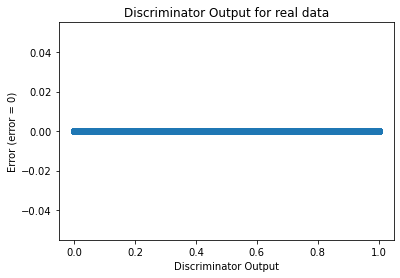

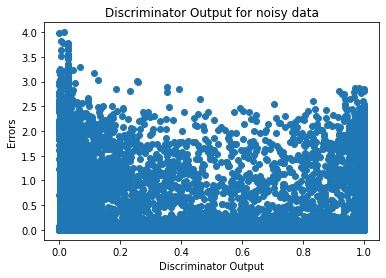

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)